***Reconnaissance optique des caractéres ***

In [33]:
#importation des librairies 
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils
import pytesseract as pt
import easyocr

Parie 1: Extraire l'immatriculation de la voiture 

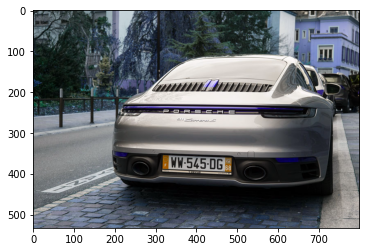

In [2]:
#lire l'image
img = cv2.imread("/4.png")
plt.imshow(img)
plt.show()


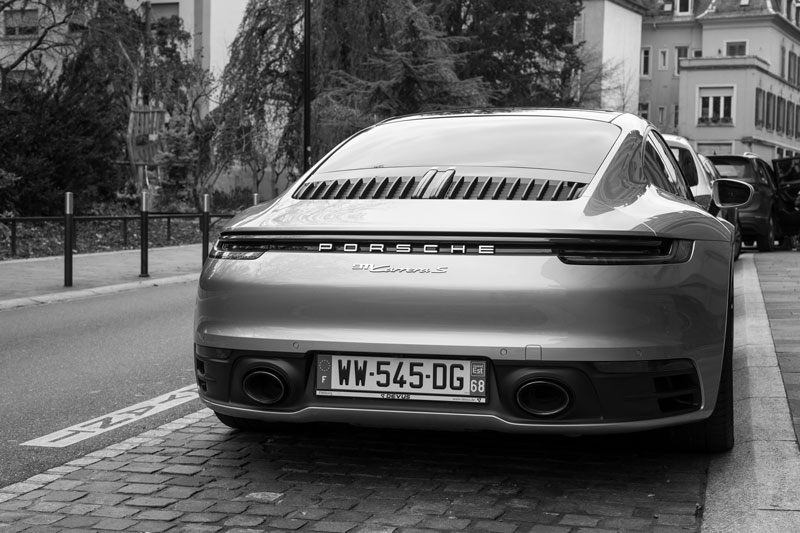

In [3]:
#convertir l'image en une image en niveau de gris  
Grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(Grey)

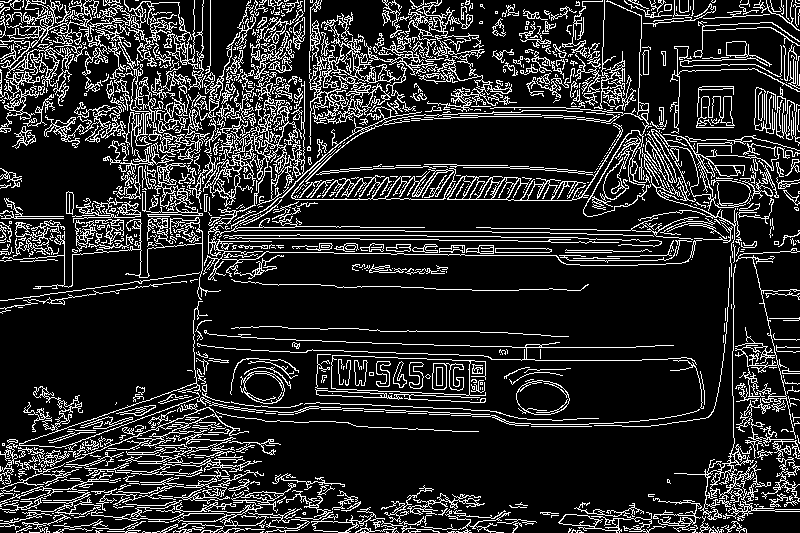

In [4]:
#Appliquer le détecteur Canny pour détecter les bords 
bords = cv2.Canny(Grey,30,200)
cv2_imshow(bords)

In [5]:
#Chercher et extraire les contours de l'image
#Déterminer le nombre des contours
contours, hierarchy = cv2.findContours(bords, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Nombre de contours trouvés = " + str(len(contours)))

Nombre de contours trouvés = 2114


In [6]:
grabContours = imutils.grab_contours((contours, hierarchy))
#Extraire les 10 premiers contours
topGrabContours = sorted(grabContours, key=cv2.contourArea, reverse=True)[:10]


[[[332 356]]

 [[468 360]]

 [[469 394]]

 [[332 388]]]


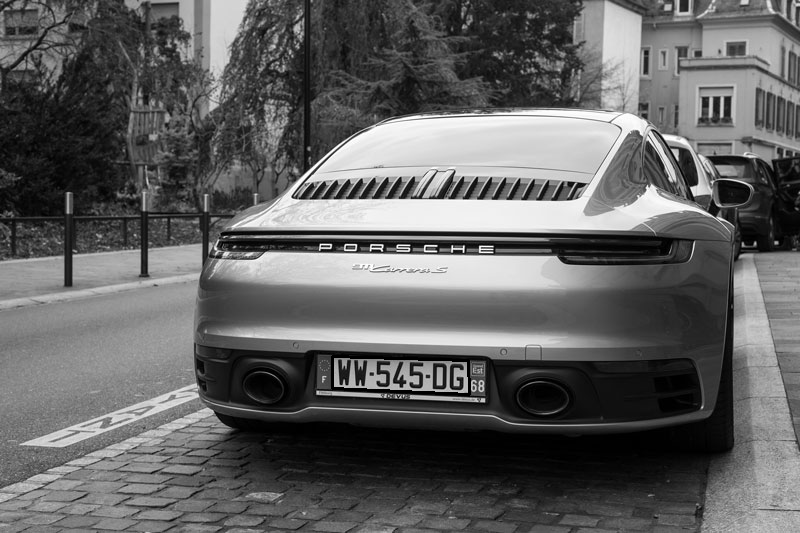

In [13]:
#Parcourir les dix premiers contours et vérifier lequel a un contour en forme de rectangleà quatre cotés.
for c in topGrabContours: 
  #for each of the contours detected, the shape of the contours is approximated using approxPolyDP()
  approx = cv2.approxPolyDP(c,10, True)
  if len(approx)==4:
    topGrabContours = approx
    break
print(topGrabContours)
#Afficher le rectangle sur l'image
cv2_imshow(Grey)

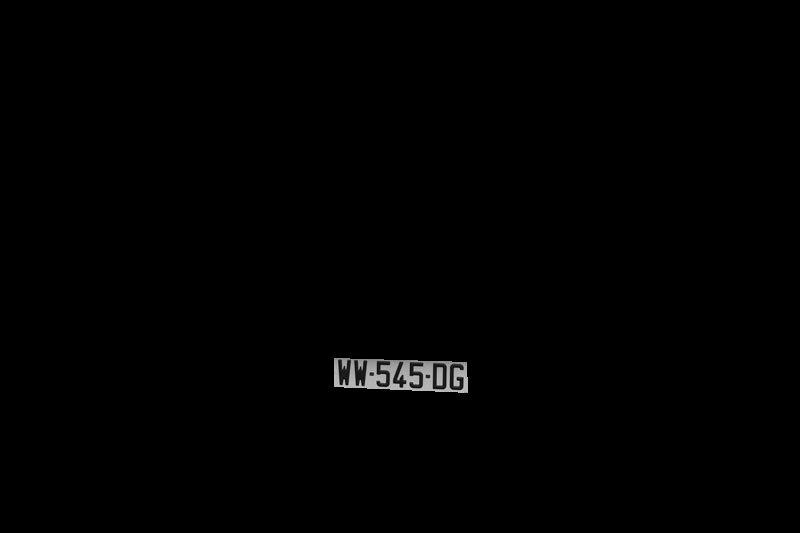

In [14]:
#Appliquer un mask sur l'image en initialisant une matrice de zeros
mask = np.zeros(Grey.shape,np.uint8)
#dessiner le contour sur l'image masquée
new_image = cv2.drawContours(mask, [topGrabContours], 0, 255, -1)
#Masquer toute l'image sauf la ROI
image_out = cv2.bitwise_and(Grey,Grey,mask=mask)
cv2_imshow(image_out)

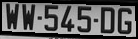

In [15]:
#Afficher seulement l'immatricule de la voiture 
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = Grey[topx:bottomx+1, topy:bottomy+1]
cv2_imshow(Cropped)

In [17]:
#Installation des bibliothéques 
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
#En utilisant le module "easyocr", on va lire l'image en format texte en chosissant comme language "Anglais"
reader = easyocr.Reader(['en'])
result = reader.readtext(Cropped,paragraph="False")
print(result)

[[[[0, 0], [138, 0], [138, 39], [0, 39]], '[l5l5og']]


In [30]:
#Afficher le texte 
print("text =" ,result[0][1])

text = [l5l5og


In [31]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(topGrabContours[2][0] + 15)
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

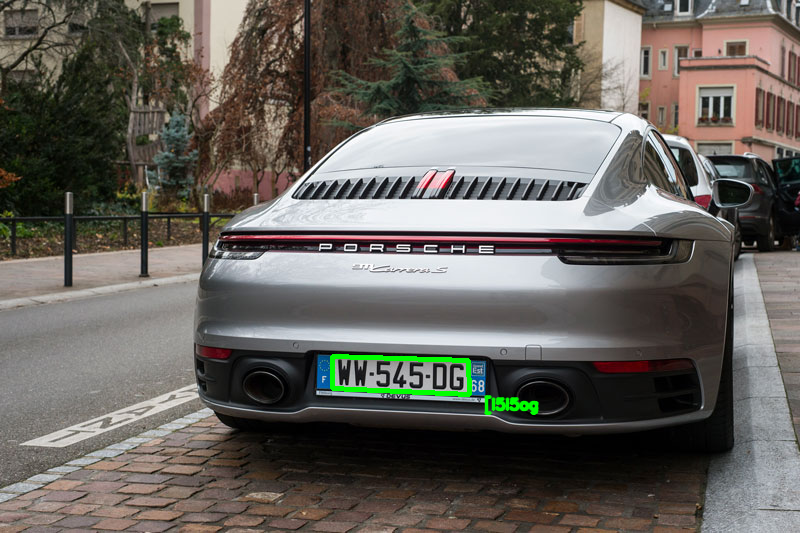

In [32]:
#dessiner contour
img2 = cv2.drawContours(img, [topGrabContours],-1, (0,255,0), 3)
#Ajouter le texte à côté du contour
img2 = cv2.putText(img2,text,bottom_right, font, 0.5,(0,255,0),2,cv2.LINE_AA)
cv2_imshow(img2)

*Partie 2: Extraction du date *

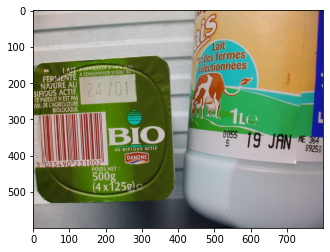

In [36]:
#lire l'image
img = cv2.imread("/test(1).png")
plt.imshow(img)
plt.show()

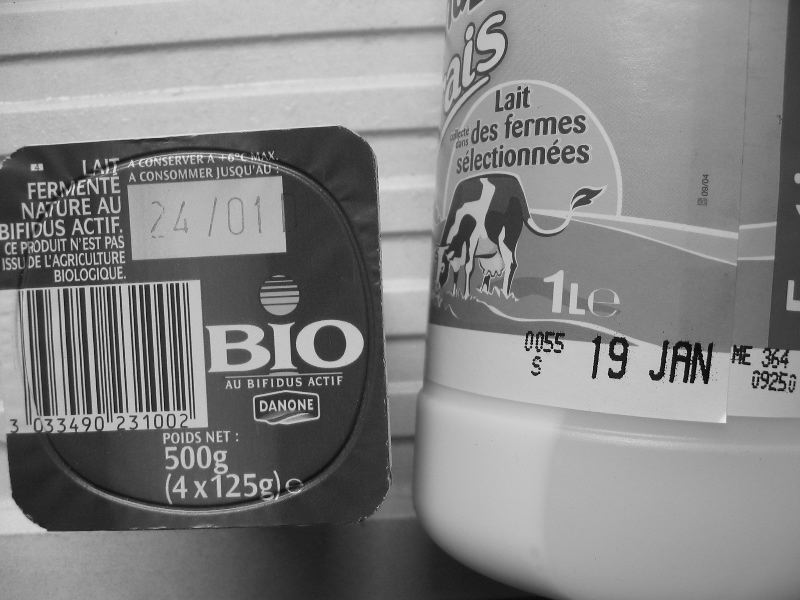

In [37]:
#convertir l'image en une image en niveau de gris  
Grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(Grey)

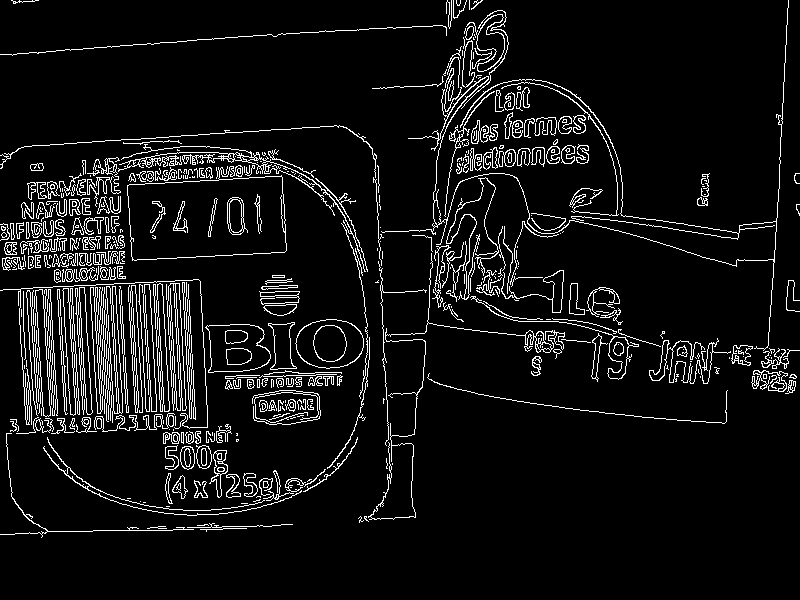

In [38]:
#Appliquer le détecteur Canny pour détecter les bords 
bords = cv2.Canny(Grey,30,200)
cv2_imshow(bords)

In [39]:
contours, hierarchy = cv2.findContours(bords, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 787


In [43]:
grabContours = imutils.grab_contours((contours, hierarchy))
#extraire les 10 premiers 
topGrabContours = sorted(grabContours, key=cv2.contourArea, reverse=True)[:10]
print(topGrabContours)

[array([[[238, 165]],

       [[237, 166]],

       [[236, 166]],

       ...,

       [[241, 166]],

       [[240, 165]],

       [[239, 165]]], dtype=int32), array([[[264, 177]],

       [[265, 176]],

       [[266, 176]],

       ...,

       [[261, 177]],

       [[262, 177]],

       [[263, 177]]], dtype=int32), array([[[326, 319]],

       [[325, 320]],

       [[324, 320]],

       [[323, 320]],

       [[322, 320]],

       [[321, 320]],

       [[320, 320]],

       [[319, 321]],

       [[318, 321]],

       [[317, 321]],

       [[316, 321]],

       [[315, 322]],

       [[314, 322]],

       [[313, 322]],

       [[312, 322]],

       [[311, 323]],

       [[310, 323]],

       [[309, 324]],

       [[308, 324]],

       [[307, 325]],

       [[306, 325]],

       [[305, 326]],

       [[304, 326]],

       [[303, 327]],

       [[302, 328]],

       [[301, 329]],

       [[300, 330]],

       [[299, 331]],

       [[299, 332]],

       [[298, 333]],

       [[298, 334]],


[[[282 177]]

 [[284 252]]

 [[132 258]]

 [[129 184]]]


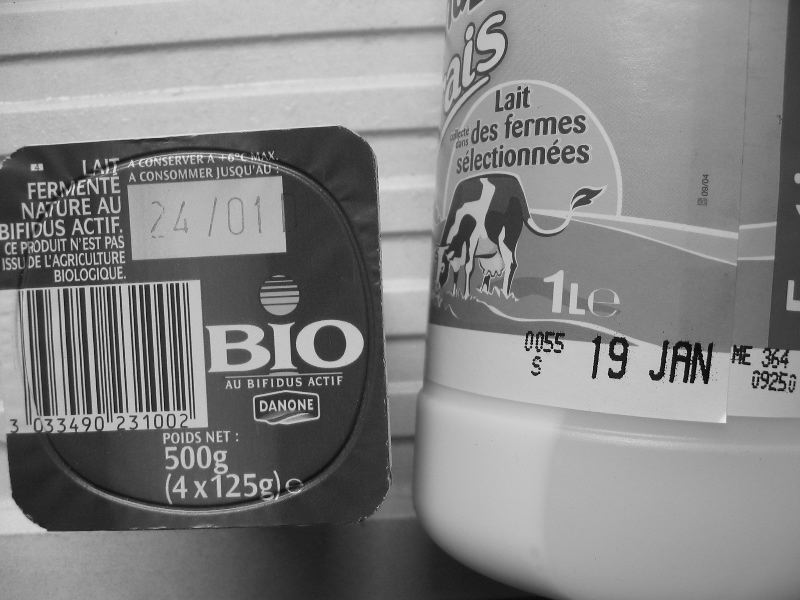

In [44]:
#Parcourir les dix premiers contours et vérifier lequel a un contour en forme de rectangleà quatre cotés.
for c in topGrabContours: 
  #for each of the contours detected, the shape of the contours is approximated using approxPolyDP()
  approx = cv2.approxPolyDP(c,10, True)
  if len(approx)==4:
    topGrabContours = approx
    break
print(topGrabContours)
#Afficher le rectangle sur l'image
cv2_imshow(Grey)

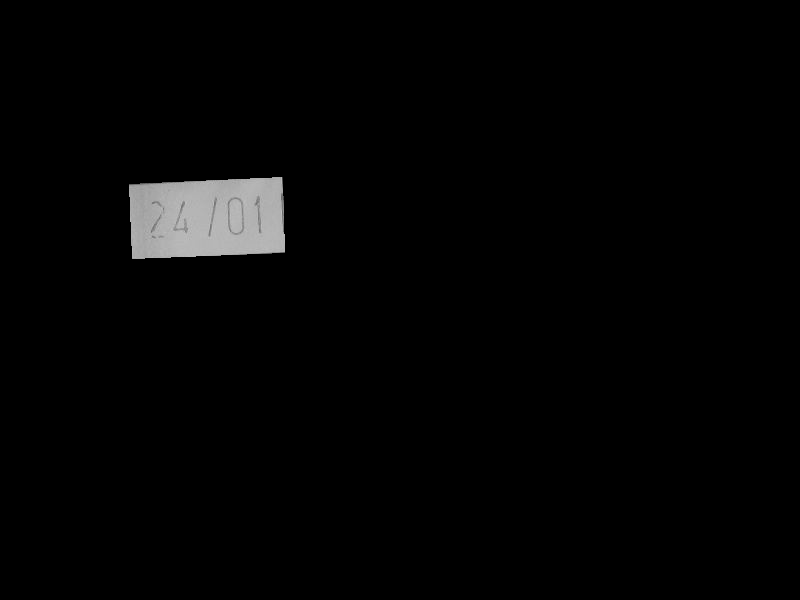

In [45]:
#Appliquer un mask sur l'image en initialisant une matrice de zeros
mask = np.zeros(Grey.shape,np.uint8)
#dessiner le contour sur l'image masquée
new_image = cv2.drawContours(mask, [topGrabContours], 0, 255, -1)
#Masquer toute l'image sauf la ROI
image_out = cv2.bitwise_and(Grey,Grey,mask=mask)
cv2_imshow(image_out)

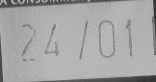

In [46]:
#Afficher seulement la date
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = Grey[topx:bottomx+1, topy:bottomy+1]
cv2_imshow(Cropped)

In [47]:
#En utilisant le module "easyocr", on va lire l'image en format texte en chosissant comme language "Anglais"
reader = easyocr.Reader(['en'])
result = reader.readtext(Cropped,paragraph="False")
print(result)

[[[[8, 8], [145, 8], [145, 72], [8, 72]], '24 |01']]


In [48]:
#Afficher la date 
print("text =" ,result[0][1])

text = 24 |01


In [49]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(topGrabContours[2][0] + 15)
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

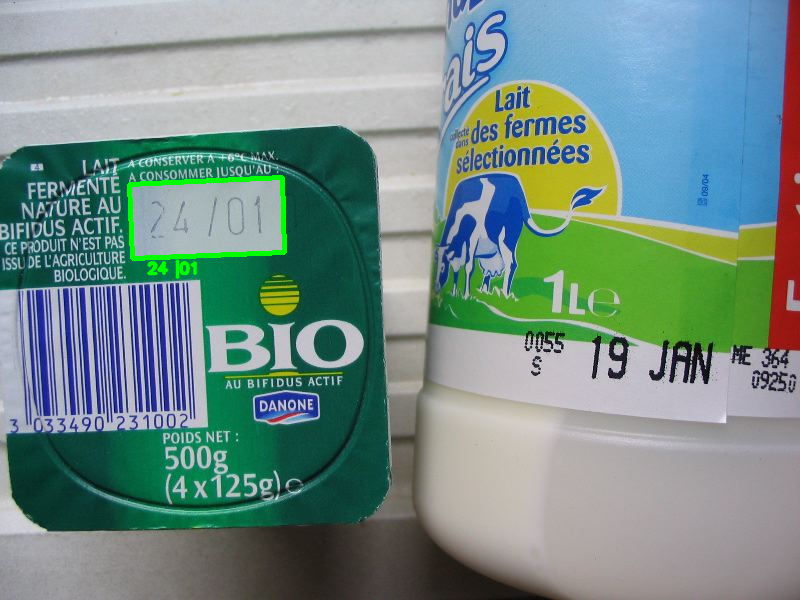

In [50]:
#dessiner le contour
img2 = cv2.drawContours(img, [topGrabContours],-1, (0,255,0), 3)
#Ajouter le texte sur l'image
img2 = cv2.putText(img2,text,bottom_right, font, 0.5,(0,255,0),2,cv2.LINE_AA)
cv2_imshow(img2)

In [51]:
#utilisation de la bibliothéque pytesseract
extractedInformation = pt.image_to_string(Cropped)
print(extractedInformation)

Partie 3:Extraction du texte 

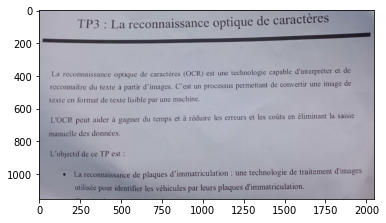

In [52]:
img_txt = cv2.imread("/texte.jpg")
plt.imshow(img_txt)
plt.show()

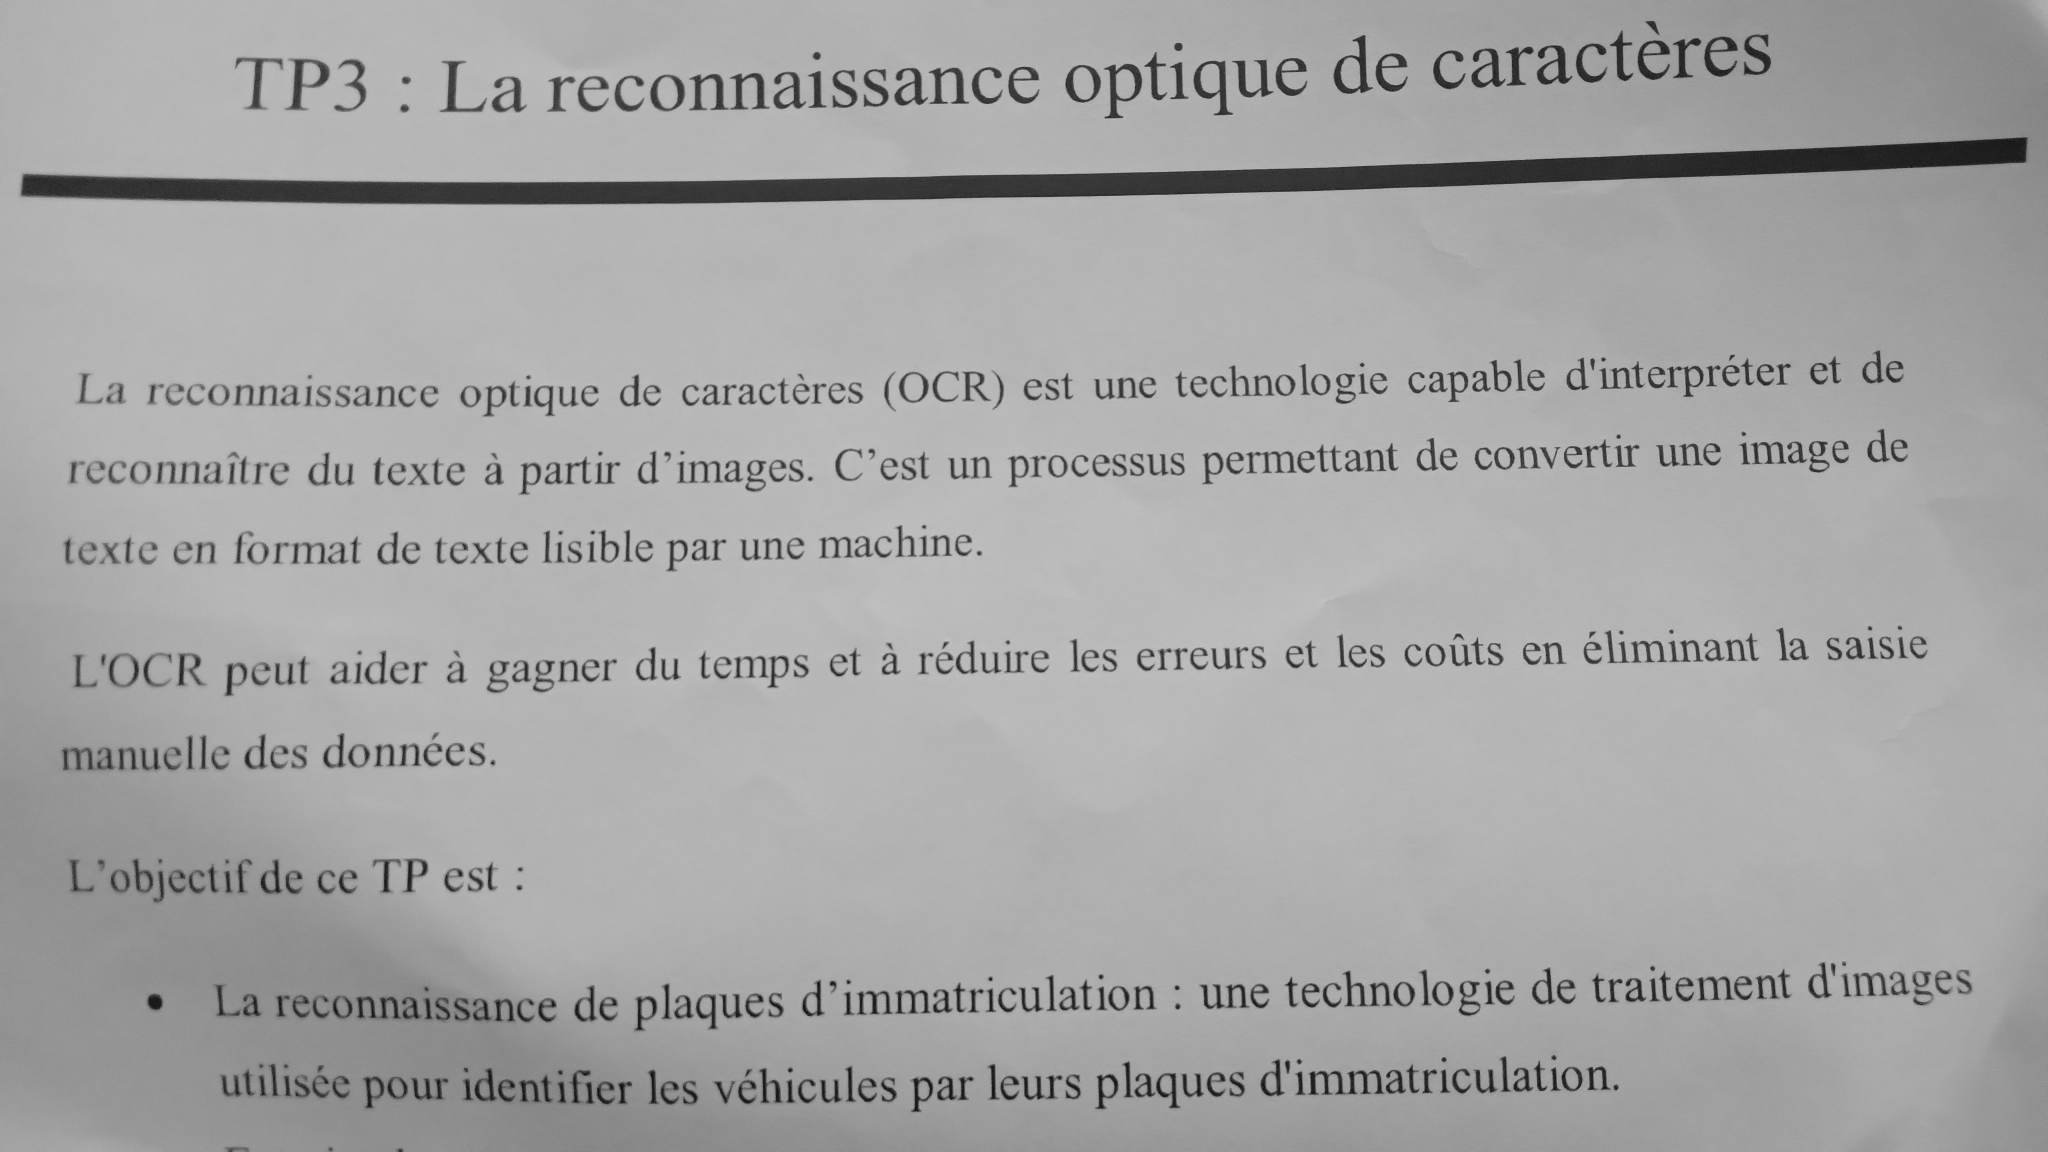

In [53]:
#convert to grayscale
IG = cv2.cvtColor(img_txt, cv2.COLOR_BGR2GRAY)
cv2_imshow(IG)

In [54]:
#Extraire le texte en utilisant pytesseract
print(pt.image_to_string(IG))

TP3 : La reconnaissance optique de caracteres

A

La reconnaissance optique de caracteres (OCR) est une technologie capable d'interpreter et de

reconnaitre du texte a partir d’images. C’est un processus permettant de convertir une image de

texte en format de texte lisible par une machine.

L'OCR peut aider a gagner du temps et 4 réduire les erreurs et les cotits en éliminant la saisie

manuelle des données.
L’objectif de ce TP est :

* Lareconnaissance de plaques d’immatriculation : une technologie de traitement d'images

utilisée pour identifier les véhicules par leurs plaques d'immatriculation.

